# Naïve Bayes

This algorithm assigns a class $\hat{c}_k$ from all the possible classes in $\mathbf{C}$, to each $y_i$ in $\mathbf{Y}$ using the Bayes Theorem as follows:

$$
P\left(\mathbf{C}\,\middle|\,\{\mathbf{X}_j\}\right) = \frac{\mathcal{L}\left(\{\mathbf{X}_j\}\,\middle|\,\mathbf{C}\right) \times P\left(\mathbf{C}\right)}{P\left(\mathbf{X}_j\right)}
$$

where:

$P\left(\mathbf{C}\,\middle|\,\{\mathbf{X}_j\}\right)$ is the posterior probability distribution, that is, given the observed feature set $\{\mathbf{X}_j\}$.

$\mathcal{L}\left(\{\mathbf{X}_j\}\,\middle|\,\mathbf{C}\right)$ is the likelihood *function* (not distribution) which holds information on the probability of having observed the feature set $\{\mathbf{X}_j\}$ taking as ground truth the classes $\mathbf{C}$.

$P\left(\mathbf{C}\right)$ is the prior probability distribution of $\mathbf{C}$, that is, the probability of each class in the absence of any observation in the feature set.

$P\left(\mathbf{X}_j\right)$ this is the posterior probability distribution integrated over all classes. It is also called the evidence.

Thus, given a set of features $\{\mathbf{X}_j\}$ and our pejudices about the possible classes $\mathbf{C}$, this algorithm seeks the maximum of the posterior probability that assigns the class $\hat{c}_k$ to the set $\{\mathbf{X}_j\}$.


In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score

sns.set(context="notebook", style="darkgrid", palette="muted", color_codes=True)

In [5]:
def data_split(dataset, ratio=0.9):
    """Splits the given dataset in the given ratio.
    
    Given a dataset and a ratio this function returns
    two datasets representing the first fraction of the
    dataset row-wise and the complementary subset.
    """
    N = dataset.shape[0]
    S = int(N*ratio)
    subset_1, subset_2 = dataset[:S], dataset[S:]
    return subset_1, subset_2

In [29]:
data = pd.read_csv("../data/raw/sp500_global_feature_pre_final.csv", index_col="Date")
data.index = pd.to_datetime(data.index)
data.columns = map(lambda name: name.lower(), data.columns)
data.index.name = data.index.name.lower()

In [35]:
# binarize class column
Y = data["class"].apply(lambda x: 1 if x=="UP" else -1)
X = data.drop(columns="class")
# implement data normalization
X_norm = X.apply(preprocessing.scale)
# implement filtering of features

# implement data splitting
X_train, X_test = data_split(X_norm, ratio=0.8)
Y_train, Y_test = data_split(Y, ratio=0.8)
# implement model training
nbg = GaussianNB()
nbg.fit(X_train, Y_train)
# implement model testing
Y_pred = nbg.predict(X_test)
# implement model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
model_eval = pd.Series(data=[accuracy, precision, recall], index="Accuracy Precision Recall".split(), name="Model Evaluation")
model_eval

Accuracy     0.855337
Precision    0.832134
Recall       0.913158
Name: Model Evaluation, dtype: float64

(736330.0, 736774.0)

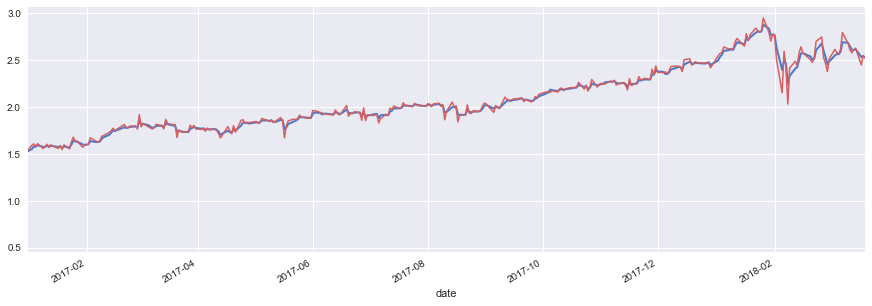

In [26]:
# implement real-life prediction
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# data["gspc.close"].plot(lw=1.7, color="0.4")
data_test["gspc.close"].plot(lw=2.0)

delta_y = abs(data_test["gspc.close"].diff())
y = data_test["gspc.close"]
price_pred = Y_pred*delta_y + y

ax.plot(data_test.index, price_pred, lw=1.5, color="r")
ax.set_xlim(pd.date_range("2017-01-01", data.index[-1]).date[[0,-1]])